# ET-287 - Processamento de sinais usando redes neurais

_Aluno: Denys Derlian Carvalho Brito_

---

## Projeto Exame - Classificação de Desempenho em Criptografia Quântica com Redes Neurais Profundas

**Objetivo:** Desenvolver um classificador baseado em redes neurais profundas capaz de prever, a partir de variáveis heterogêneas de um ambiente de criptografia quântica, a classe de desempenho (“Ótimo” vs. “Subótimo”) com alta acurácia e boa capacidade de generalização.


No contexto da computação quântica, a criptografia quântica oferece novos paradigmas de segurança baseados em princípios de mecânica quântica. Sob essa perspectiva, a aplicação de técnicas de aprendizado de máquina tem sido explorada para otimizar e aprimorar o desempenho dos sistemas de criptografia quântica. Todavia, a complexidade inerente a esses sistemas, aliada à heterogeneidade dos dados gerados, impõe desafios significativos para a construção de modelos preditivos eficazes. Nesse cenário, propõe uma abordagem que foca na classificação da **performance da rede** de forma integrada, considerando não apenas os parâmetros quânticos e de segurança, mas também métricas de performance de rede, características de _big data_ e utilização de recursos computacionais, que em conjunto determinam a viabilidade prática dos sistema em cenários operacionais reais.

---

## 1. Análise Exploratória dos Dados (EDA)

(Inserir sumário da análise exploratória dos dados aqui)

In [30]:
# Instalar dependências se necessário
# !pip install kagglehub[pandas-datasets]
# !pip install optuna
# !pip install plotly
# !pip install tensorflow

In [1]:
# Importar bibliotecas a partir do módulo config
from modules.config import *

/home/denysderlian/anaconda3/envs/NNenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-07 19:06:44.762554: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-07 19:06:44.794056: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-07 19:06:45.759322: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see sl

Num GPUs Available:  1


In [2]:
# Download do dataset do Kaggle
path = kagglehub.dataset_download("ziya07/quantum-encryption-performance-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/denysderlian/.cache/kagglehub/datasets/ziya07/quantum-encryption-performance-dataset/versions/1


In [3]:
FILE_NAME = "quantum_encryption_performance_dataset.csv"

# Carregar o dataset para pandas DataFrame
df = pd.read_csv(os.path.join(path, FILE_NAME))
print("Dataset carregado com sucesso. Número de amostras:", len(df))
print("Shape:", df.shape)
print("Colunas:", df.columns.tolist())
print("Variável alvo 'Performance_Target' distribuição:")
print(df["Performance_Target"].value_counts(normalize=True))

Dataset carregado com sucesso. Número de amostras: 1000
Shape: (1000, 25)
Colunas: ['Quantum_Key_Size_bits', 'Quantum_Protocol_Type', 'Key_Distribution_Method', 'Encryption_Latency_ms', 'Decryption_Latency_ms', 'Throughput_Mbps', 'Latency_ms', 'Packet_Loss_percent', 'Bandwidth_Utilization_percent', 'Round_Trip_Time_ms', 'Encryption_Strength', 'Attack_Type', 'Vulnerability_Level', 'Attack_Success_Rate_percent', 'Intrusion_Detection_Accuracy_percent', 'Data_Volume_GB', 'Data_Variety', 'Data_Velocity_MB_s', 'Data_Complexity', 'Real_Time_Processing', 'Resource_Utilization_CPU_percent', 'Resource_Utilization_Memory_percent', 'Energy_Consumption_kWh', 'Optimization_Level', 'Performance_Target']
Variável alvo 'Performance_Target' distribuição:
Performance_Target
Suboptimal    0.918
Optimal       0.082
Name: proportion, dtype: float64


In [4]:
# Vizualizar as primeiras linhas do DataFrame
df.head()

,Quantum_Key_Size_bits,Quantum_Protocol_Type,Key_Distribution_Method,Encryption_Latency_ms,Decryption_Latency_ms,Throughput_Mbps,Latency_ms,Packet_Loss_percent,Bandwidth_Utilization_percent,Round_Trip_Time_ms,...,Data_Volume_GB,Data_Variety,Data_Velocity_MB_s,Data_Complexity,Real_Time_Processing,Resource_Utilization_CPU_percent,Resource_Utilization_Memory_percent,Energy_Consumption_kWh,Optimization_Level,Performance_Target
0,512,BB84,Hybrid QKD,35.153677,21.343097,146.889261,49.642896,0.784638,70.862317,135.237133,...,591.119462,Mixed,48.112247,Structured,1,69.715182,61.885496,3.482189,NaN,Suboptimal
1,512,BB84,Post-Quantum,79.439052,47.622924,54.522812,4.260948,4.303451,80.306828,79.379681,...,699.177426,Mixed,11.284507,Structured,1,84.980568,67.514640,3.272271,NaN,Suboptimal
2,512,E91,Hybrid QKD,93.685088,67.782635,244.868724,22.604132,4.008153,87.822996,98.423516,...,638.781966,Audio,82.785208,Semi-Structured,1,37.104425,40.128608,4.297842,Caching,Suboptimal
3,1024,B92,QKD,71.399673,55.767818,618.978515,19.969997,1.215919,55.353388,64.637315,...,516.576674,Images,89.278938,Semi-Structured,0,87.835832,54.993475,0.560232,Parallel Processing,Suboptimal
4,128,E91,QKD,51.927749,10.021325,838.971535,41.890560,1.027366,53.903645,49.824114,...,247.983800,Audio,15.603028,Semi-Structured,0,62.824875,68.011373,0.476705,Parallel Processing,Suboptimal


In [5]:
# Analisar informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Quantum_Key_Size_bits                 1000 non-null   int64  
 1   Quantum_Protocol_Type                 1000 non-null   object 
 2   Key_Distribution_Method               1000 non-null   object 
 3   Encryption_Latency_ms                 1000 non-null   float64
 4   Decryption_Latency_ms                 1000 non-null   float64
 5   Throughput_Mbps                       1000 non-null   float64
 6   Latency_ms                            1000 non-null   float64
 7   Packet_Loss_percent                   1000 non-null   float64
 8   Bandwidth_Utilization_percent         1000 non-null   float64
 9   Round_Trip_Time_ms                    1000 non-null   float64
 10  Encryption_Strength                   1000 non-null   object 
 11  Attack_Type       

In [6]:
# Contar os valores únicos e valores ausentes em cada coluna
for column in df.columns:
    unique_values = df[column].nunique()
    missing_values = df[column].isnull().sum()
    print(f"Coluna: {column} | Valores únicos: {unique_values} | Valores ausentes: {missing_values}")

Coluna: Quantum_Key_Size_bits | Valores únicos: 4 | Valores ausentes: 0
Coluna: Quantum_Protocol_Type | Valores únicos: 4 | Valores ausentes: 0
Coluna: Key_Distribution_Method | Valores únicos: 3 | Valores ausentes: 0
Coluna: Encryption_Latency_ms | Valores únicos: 1000 | Valores ausentes: 0
Coluna: Decryption_Latency_ms | Valores únicos: 1000 | Valores ausentes: 0
Coluna: Throughput_Mbps | Valores únicos: 1000 | Valores ausentes: 0
Coluna: Latency_ms | Valores únicos: 1000 | Valores ausentes: 0
Coluna: Packet_Loss_percent | Valores únicos: 1000 | Valores ausentes: 0
Coluna: Bandwidth_Utilization_percent | Valores únicos: 1000 | Valores ausentes: 0
Coluna: Round_Trip_Time_ms | Valores únicos: 1000 | Valores ausentes: 0
Coluna: Encryption_Strength | Valores únicos: 3 | Valores ausentes: 0
Coluna: Attack_Type | Valores únicos: 3 | Valores ausentes: 232
Coluna: Vulnerability_Level | Valores únicos: 3 | Valores ausentes: 259
Coluna: Attack_Success_Rate_percent | Valores únicos: 1000 | Valo

In [7]:
# Checar linhas duplicadas
duplicate_rows = df[df.duplicated()]
print("Número de linhas duplicadas:", len(duplicate_rows))

Número de linhas duplicadas: 0


In [8]:
# Verificar o sumário estatístico das colunas numéricas
df.describe()

,Quantum_Key_Size_bits,Encryption_Latency_ms,Decryption_Latency_ms,Throughput_Mbps,Latency_ms,Packet_Loss_percent,Bandwidth_Utilization_percent,Round_Trip_Time_ms,Attack_Success_Rate_percent,Intrusion_Detection_Accuracy_percent,Data_Volume_GB,Data_Velocity_MB_s,Real_Time_Processing,Resource_Utilization_CPU_percent,Resource_Utilization_Memory_percent,Energy_Consumption_kWh
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,473.728000,55.297493,53.974259,493.397150,25.856076,2.552600,74.599686,103.673147,24.955977,89.927550,505.753856,50.517481,0.524000,55.260505,44.820849,2.577575
std,342.091626,26.104528,26.572745,294.144331,14.533789,1.422894,14.203389,54.757147,14.375308,5.849979,285.898806,28.491776,0.499674,20.318660,20.172306,1.422093
min,128.000000,10.022460,10.021325,11.705918,1.018842,0.008928,50.039134,10.063644,0.024422,80.002233,1.175679,1.128838,0.000000,20.043065,10.024454,0.100582
25%,128.000000,33.521419,30.742678,224.765615,13.166382,1.322235,62.816847,56.888239,12.404365,84.966219,255.497759,26.134490,0.000000,37.902502,27.510203,1.367039
50%,256.000000,54.491038,53.171897,485.014911,26.153436,2.585202,74.757263,101.838709,24.605172,89.717490,506.158638,50.660480,1.000000,55.893076,44.521683,2.604149
75%,512.000000,77.291526,77.723093,752.880498,38.565462,3.773771,87.063033,149.730771,37.871374,95.034870,747.236180,74.499845,1.000000,72.240552,62.093413,3.703966
max,1024.000000,99.970279,99.939560,998.593520,49.999656,4.999747,99.937230,199.982409,49.926274,99.986970,999.240439,99.889548,1.000000,89.943854,79.978989,4.999492


Coluna: Quantum_Protocol_Type | Valores únicos: 4 | Valores ausentes: 0
Coluna: Key_Distribution_Method | Valores únicos: 3 | Valores ausentes: 0
Coluna: Encryption_Strength | Valores únicos: 3 | Valores ausentes: 0
Coluna: Attack_Type | Valores únicos: 3 | Valores ausentes: 232
Coluna: Vulnerability_Level | Valores únicos: 3 | Valores ausentes: 259
Coluna: Data_Variety | Valores únicos: 4 | Valores ausentes: 0
Coluna: Data_Complexity | Valores únicos: 3 | Valores ausentes: 0
Coluna: Optimization_Level | Valores únicos: 3 | Valores ausentes: 220
Coluna: Performance_Target | Valores únicos: 2 | Valores ausentes: 0


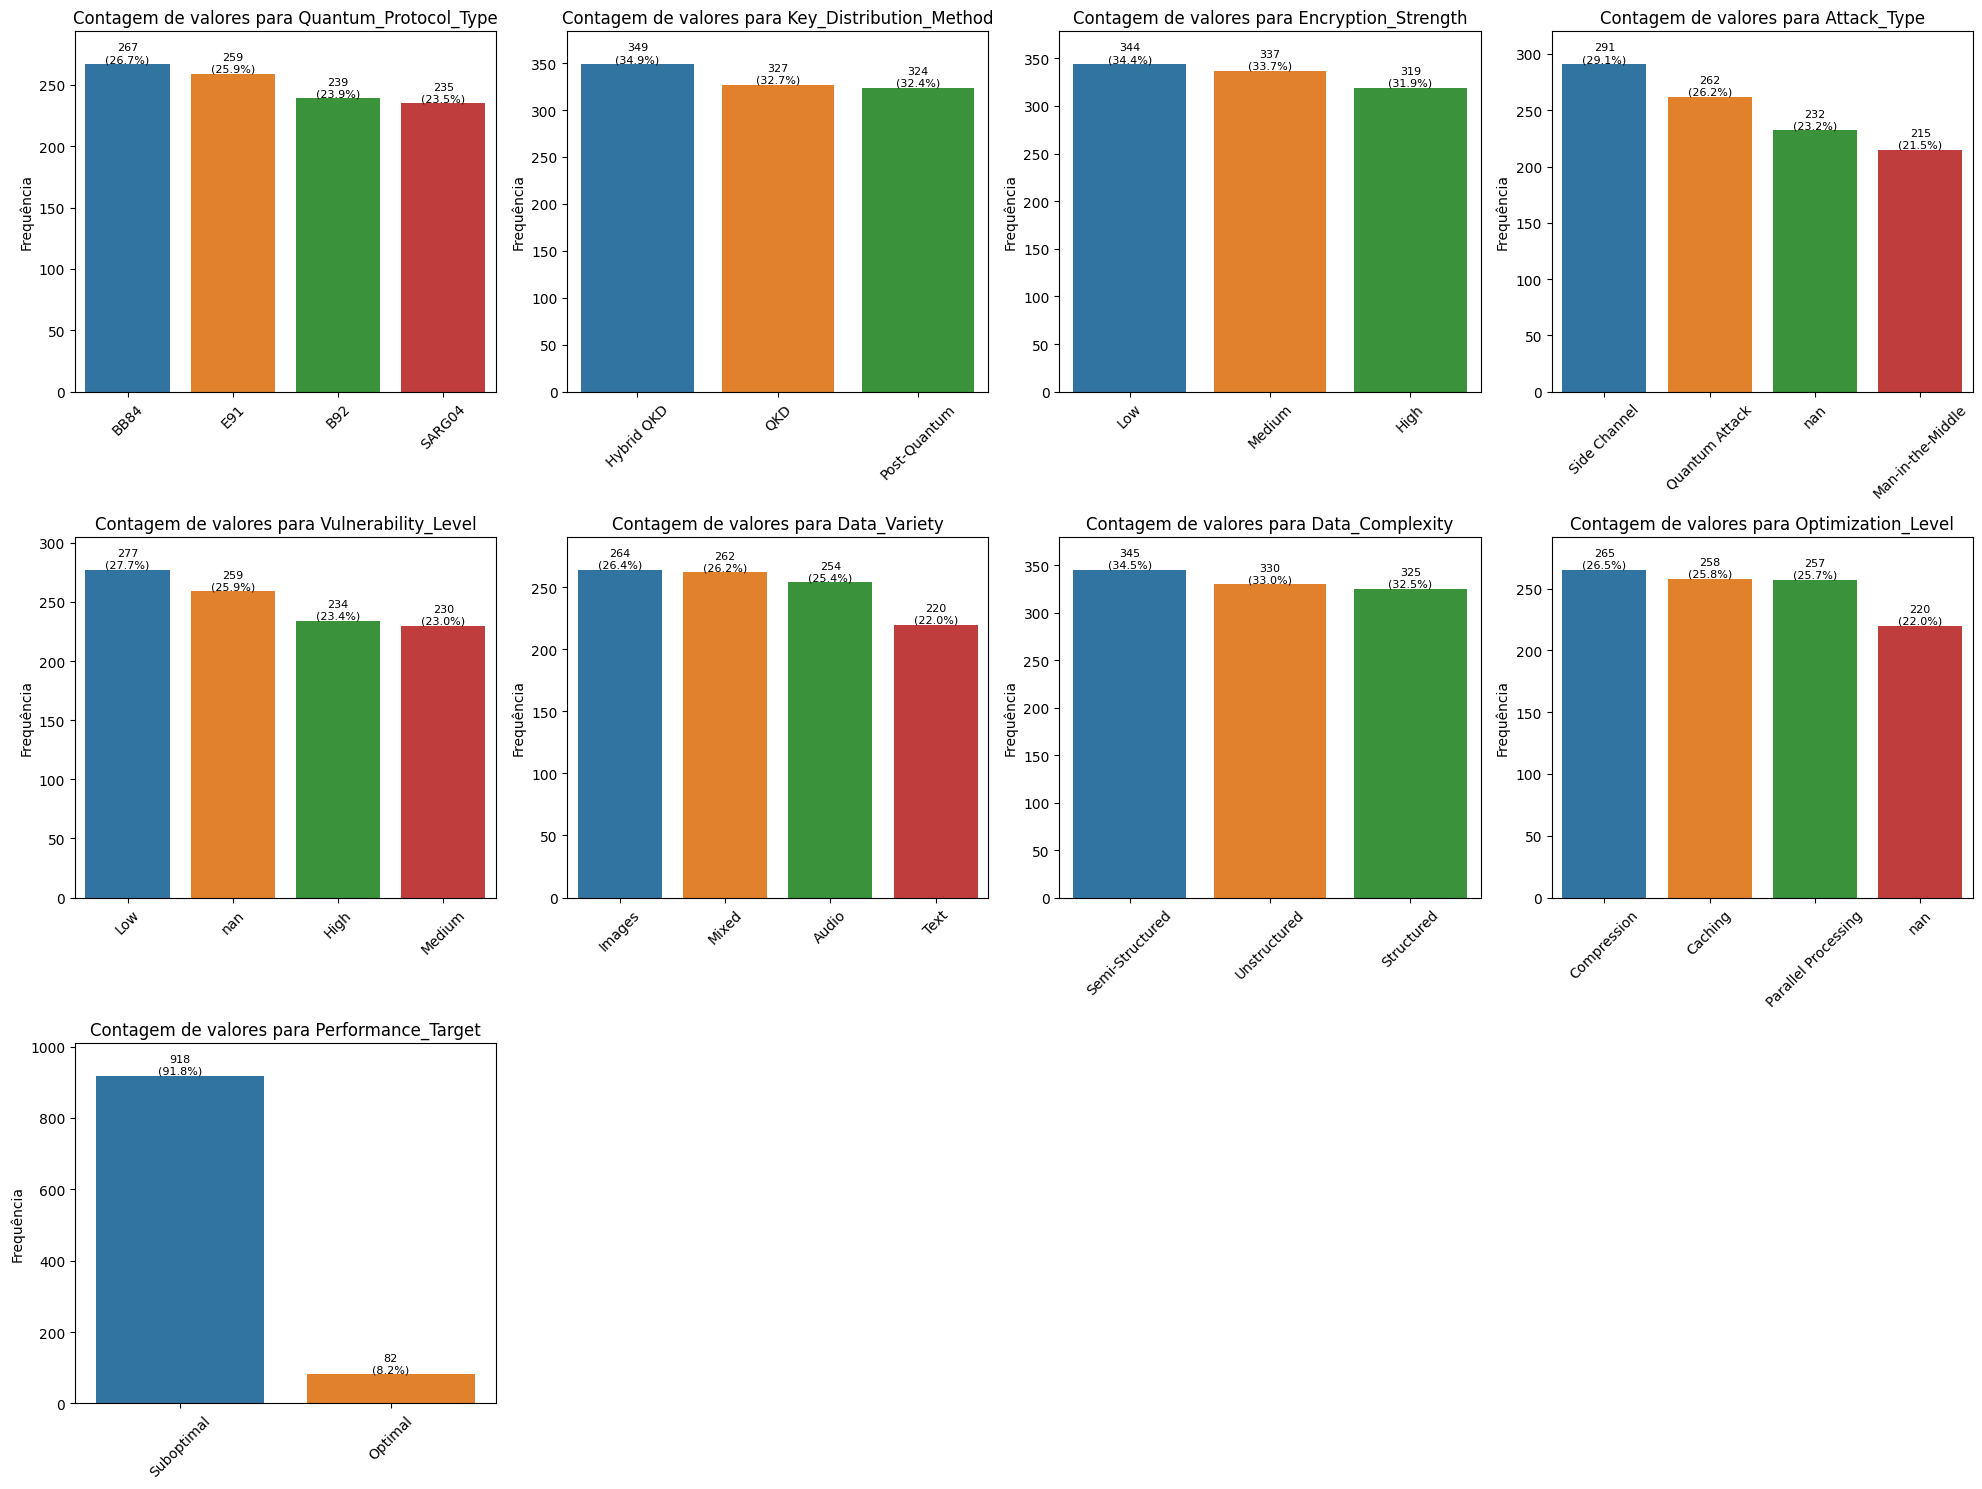

In [9]:
# Verificar as variáveis categóricas, mostrar cada valor único, a frequência de cada um, o percentual, valores faltantes e plotar gráficos de barras
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
cols = 4
num_vars = len(categorical_columns)
rows = int(np.ceil(num_vars / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    ax = axes[idx]
    vc = df[column].value_counts(dropna=False)
    missing = df[column].isnull().sum()
    unique = df[column].nunique(dropna=True)
    print(f"Coluna: {column} | Valores únicos: {unique} | Valores ausentes: {missing}")

    # usar barplot com valores pré-calculados para facilitar anotações (contagem e percentual)
    sns.barplot(x=vc.index.astype(str), y=vc.values, ax=ax, hue=vc.index.astype(str), legend=False)  # type: ignore
    ax.set_title(f'Contagem de valores para {column}')
    ax.set_ylabel('Frequência')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, 1.1 * vc.values.max())

    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}\n({height/total*100:.1f}%)',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

# desligar eixos sobrando
for j in range(num_vars, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


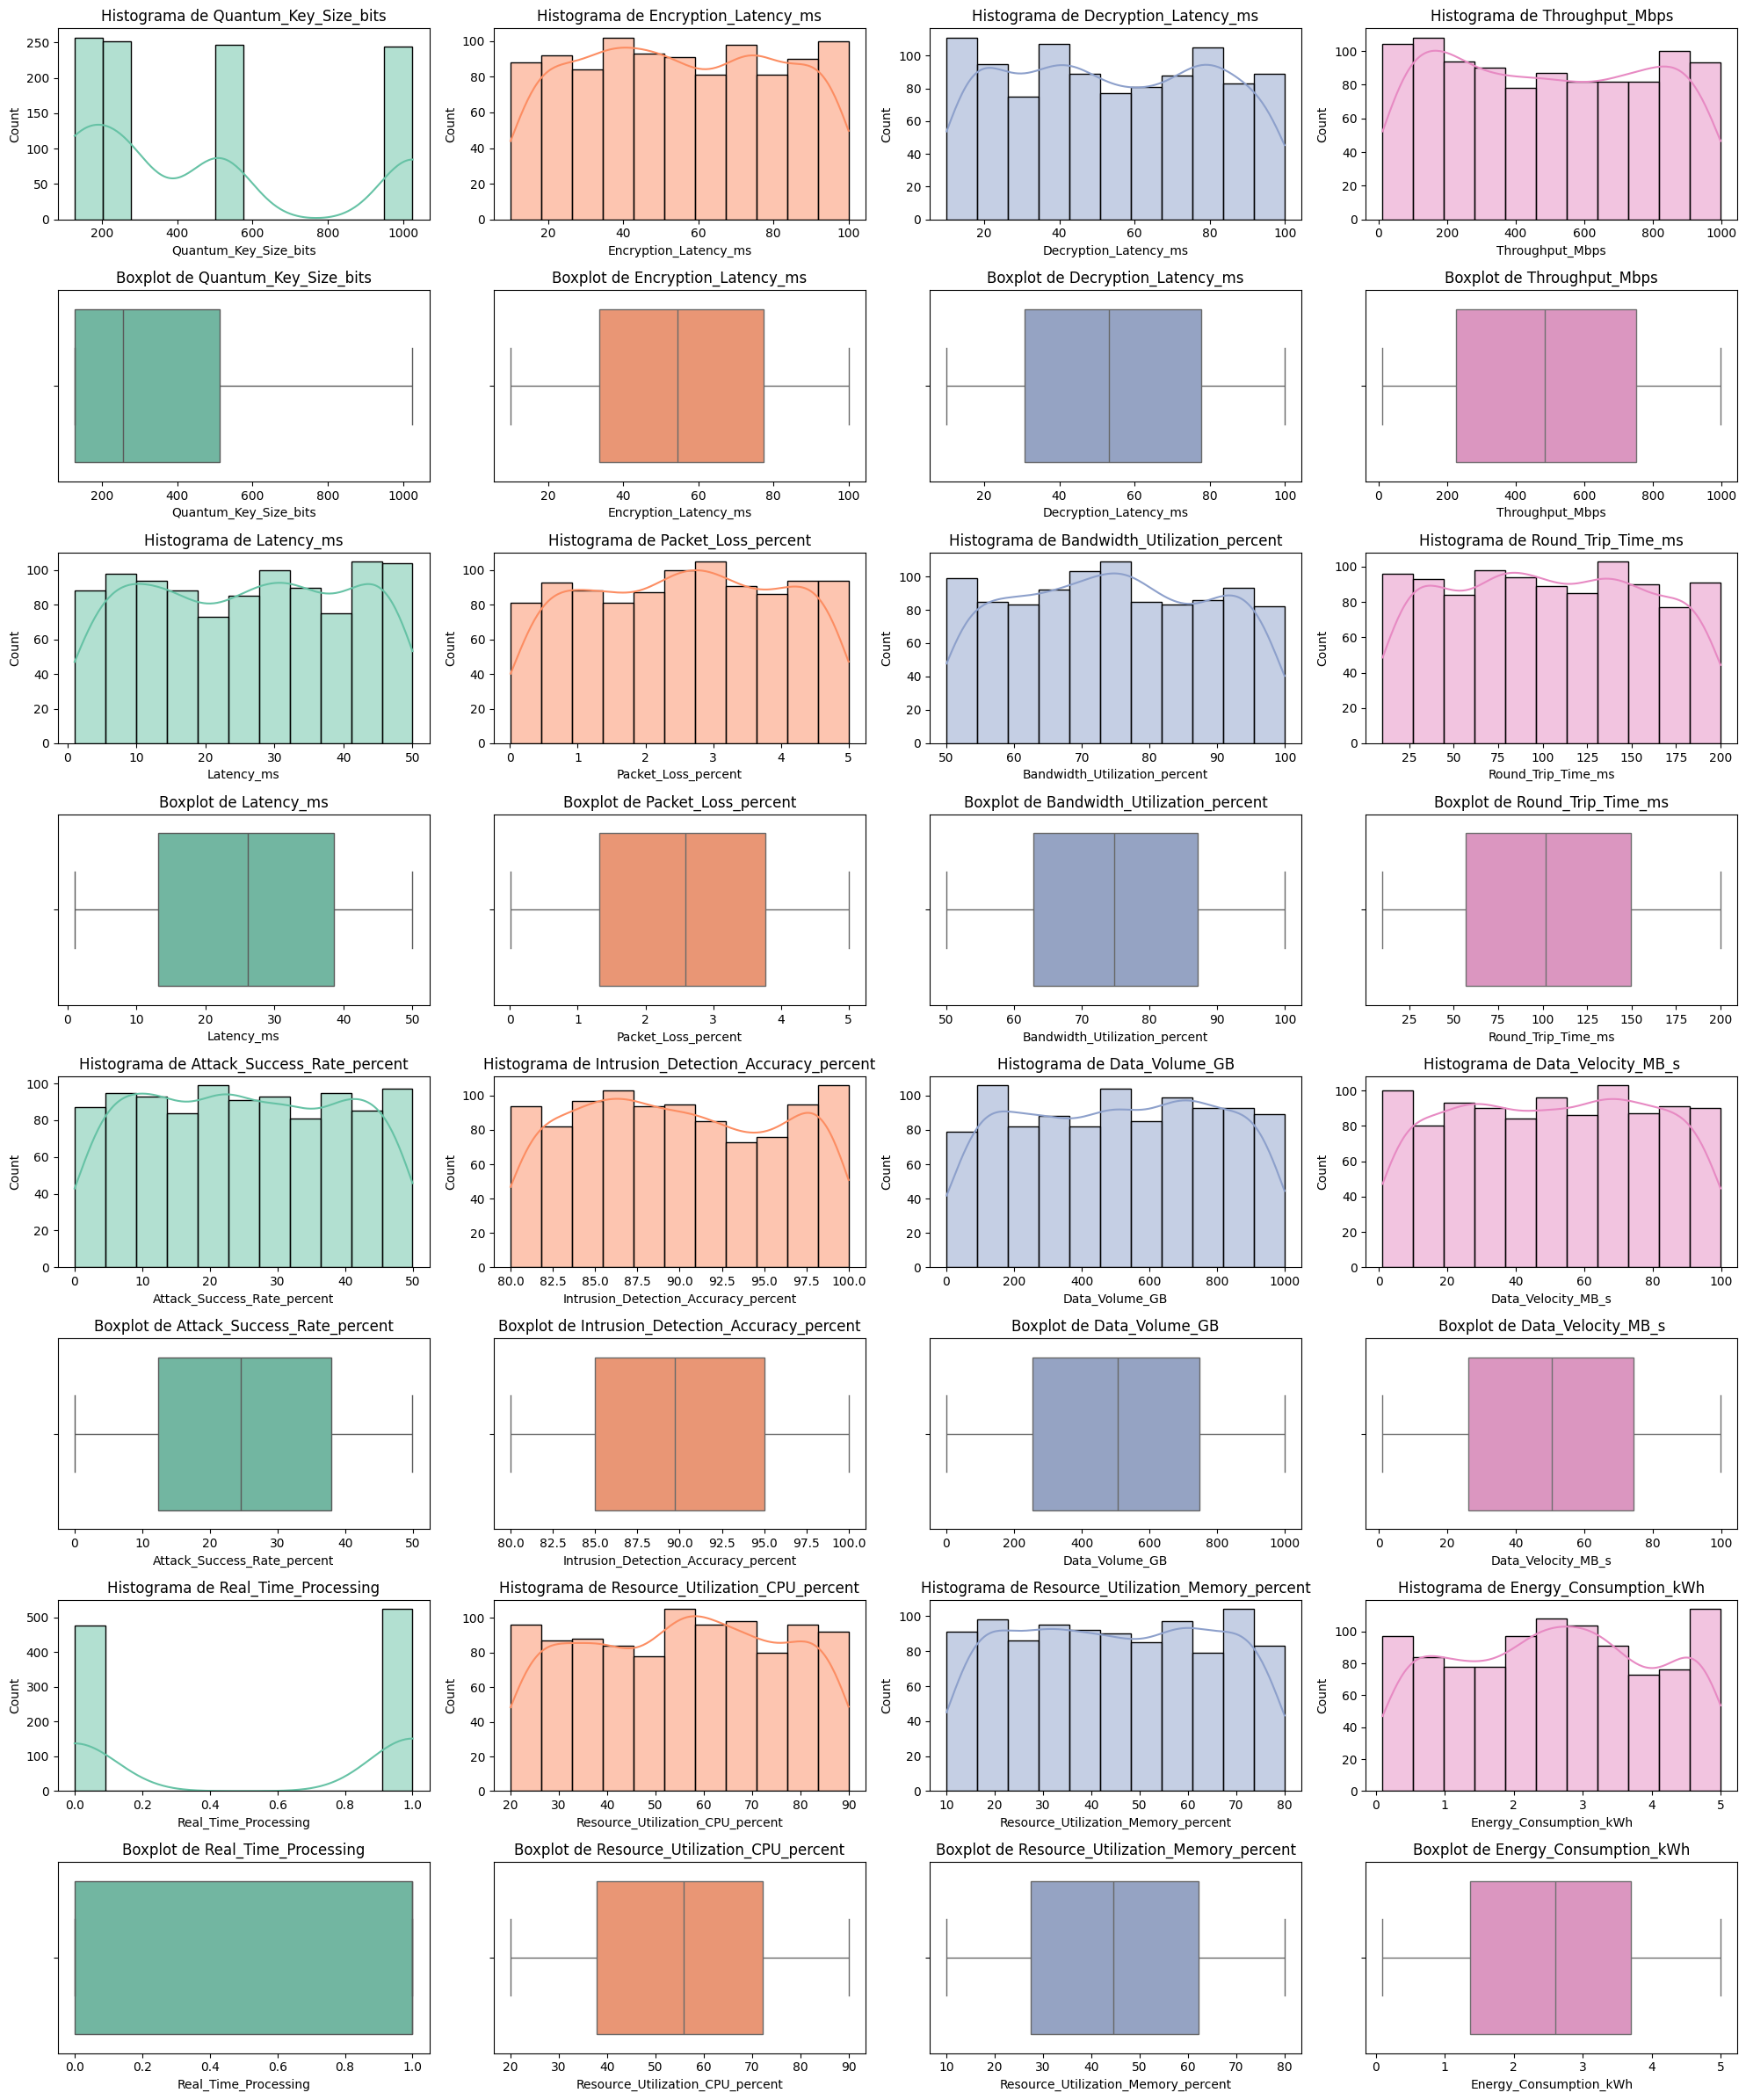

In [10]:
# Para as categorias numéricas, criar histogramas e boxplots para visualizar a distribuição dos dados e identificar possíveis outliers
numerical_columns = df.select_dtypes(include=['number']).columns

# Paleta de cores customizada (4 cores)
custom_palette = sns.color_palette("Set2", 4)

# Mostrar 4 plots (variáveis) por linha, cada variável com histograma acima e boxplot abaixo
num_vars = len(numerical_columns)
cols = 4
rows = int(np.ceil(num_vars / cols))

fig, axes = plt.subplots(nrows=rows * 2, ncols=cols, figsize=(cols * 5, rows * 6))
axes = np.array(axes)  # garantir array numpy para indexação consistente

for idx, column in enumerate(numerical_columns):
    r = idx // cols
    c = idx % cols
    hist_ax = axes[2 * r, c]
    box_ax = axes[2 * r + 1, c]

    sns.histplot(df[column], kde=True, ax=hist_ax, color=custom_palette[idx % len(custom_palette)]) # type: ignore
    hist_ax.set_title(f'Histograma de {column}')

    sns.boxplot(x=df[column], ax=box_ax, color=custom_palette[idx % len(custom_palette)])
    box_ax.set_title(f'Boxplot de {column}')

# Desligar eixos sobrando (quando não há variável para a posição)
total_cells = rows * cols
for empty_idx in range(num_vars, total_cells):
    r = empty_idx // cols
    c = empty_idx % cols
    axes[2 * r, c].axis('off')
    axes[2 * r + 1, c].axis('off')

plt.tight_layout()
plt.show()

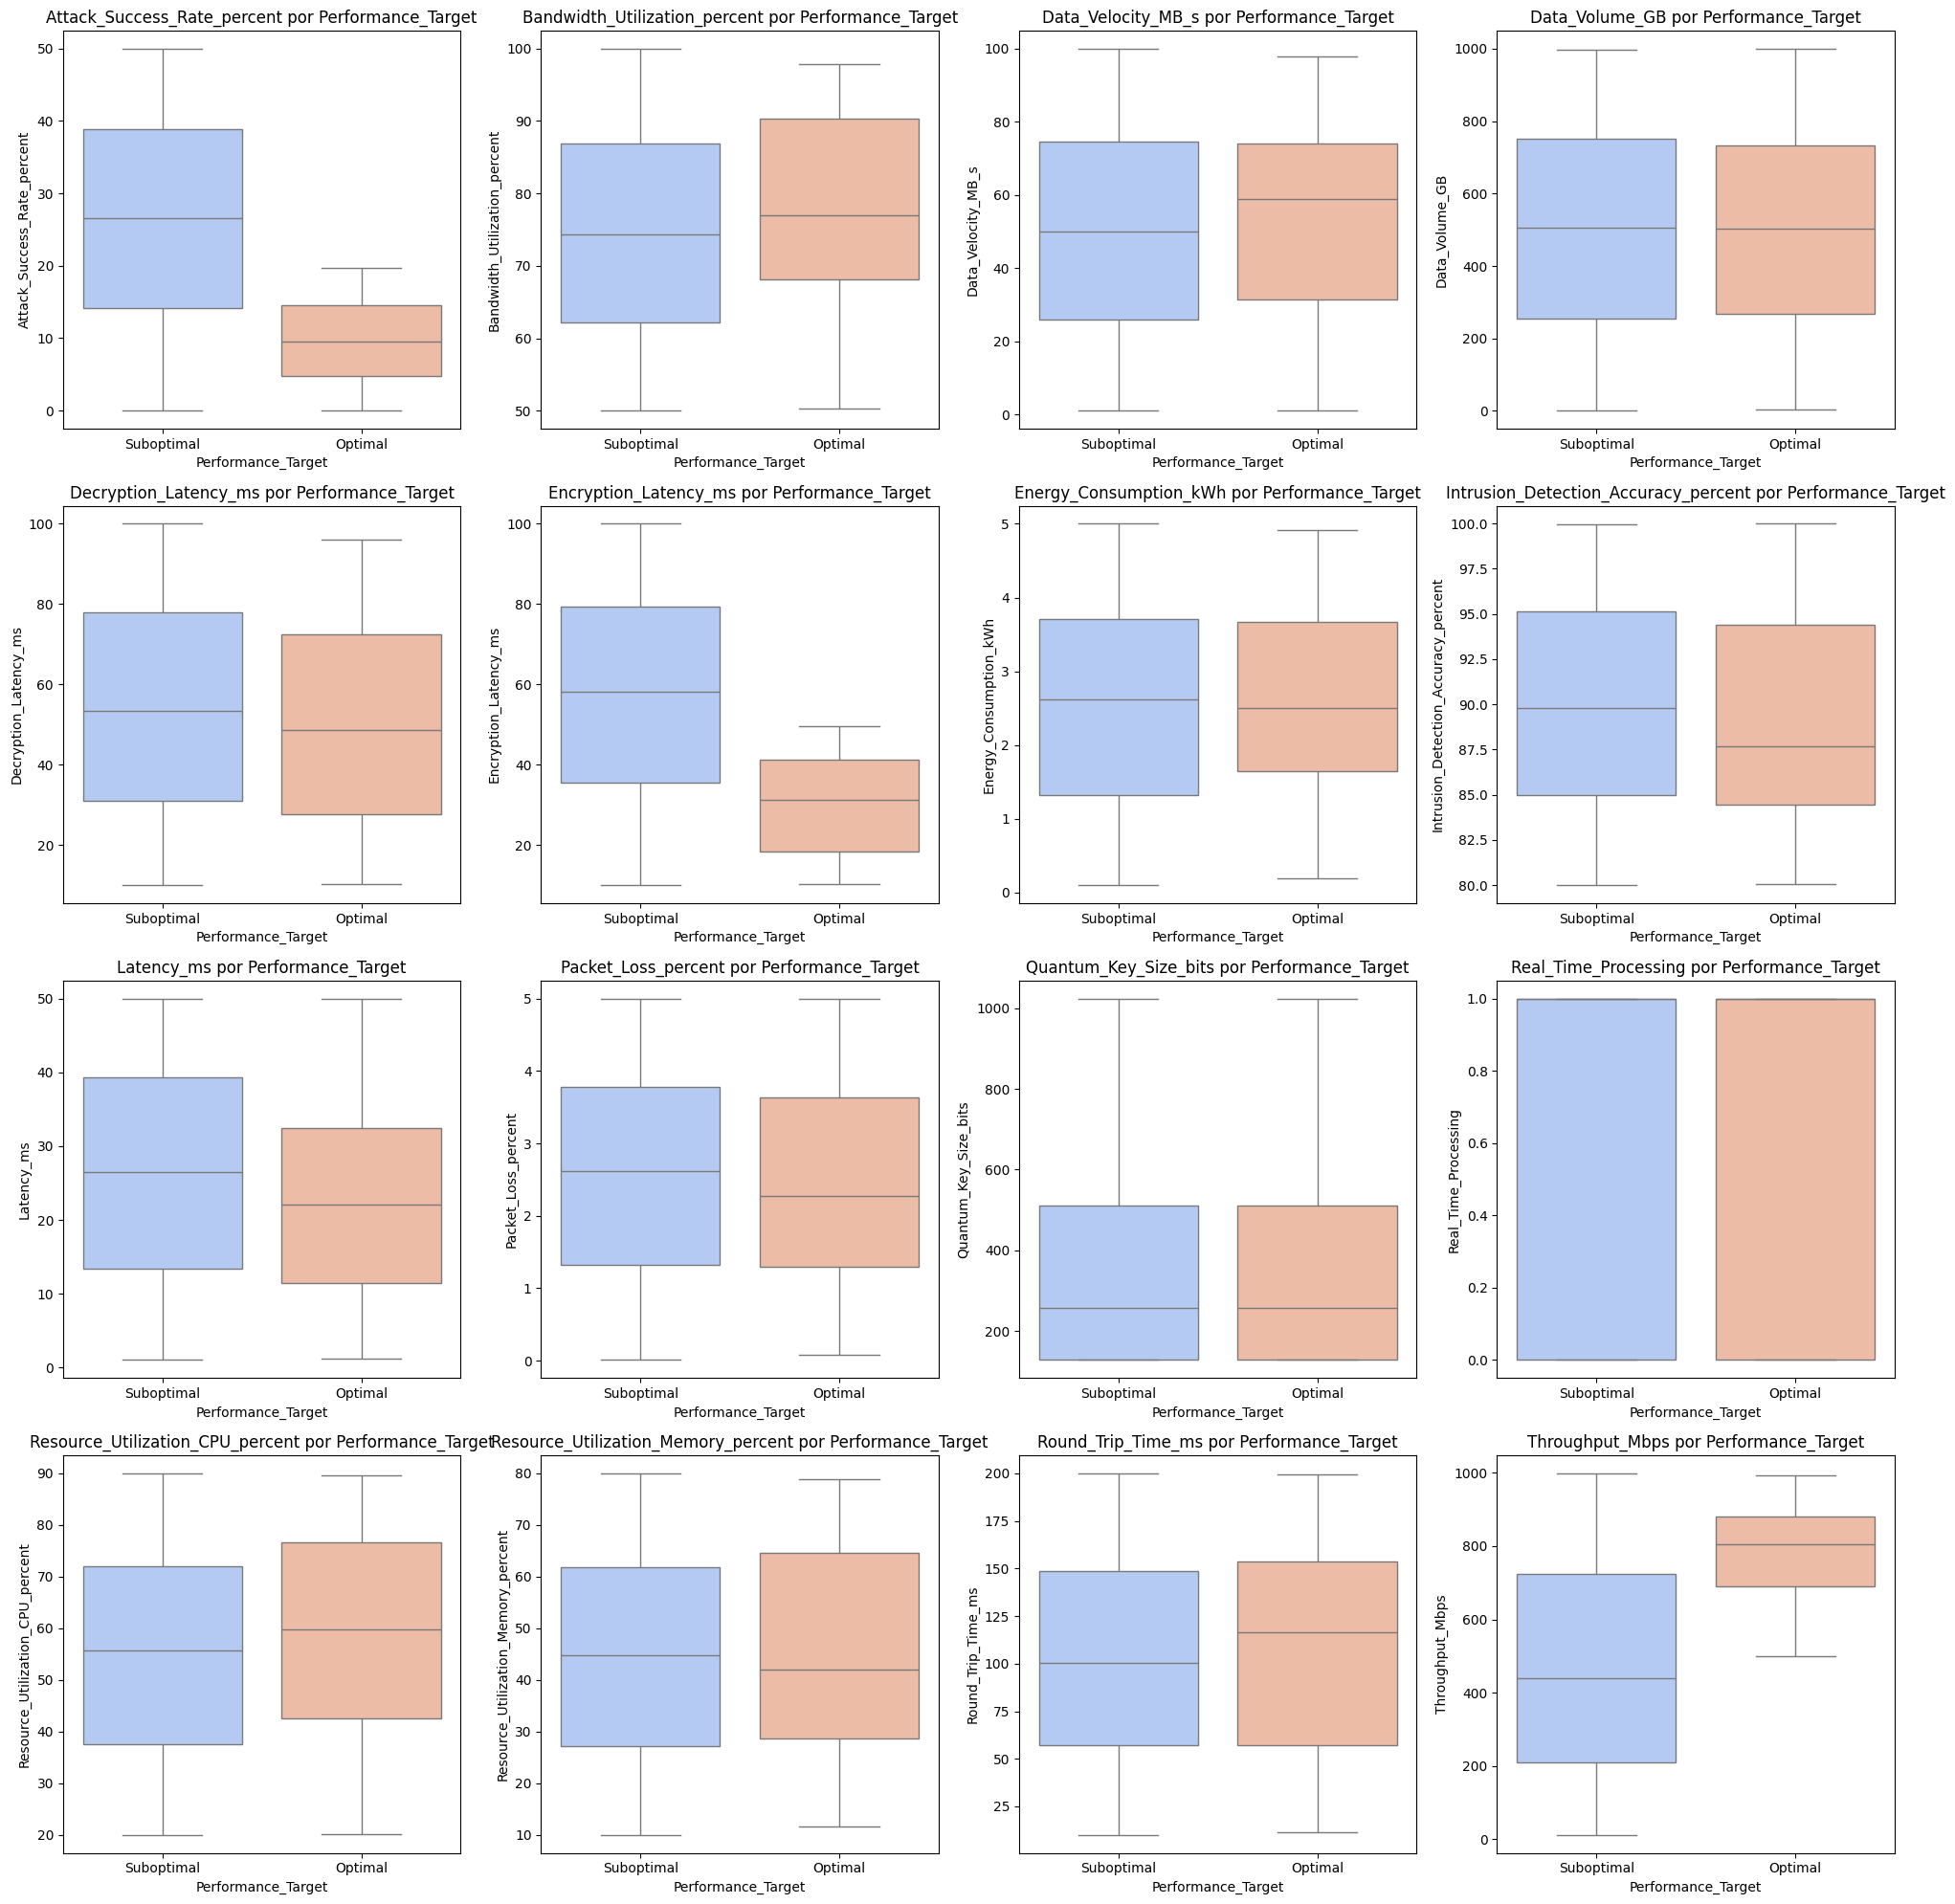

In [11]:
# Usar grouped boxplots para comparar a distribuição de uma variável numérica para as duas classes da variável alvo categórica 'Performance_Target'
target_variable = 'Performance_Target'
# selecionar colunas numéricas e garantir que a coluna alvo não faça parte delas
numerical_columns = df.select_dtypes(include=['number']).columns.difference([target_variable])

cols = 4
rows = int(np.ceil(len(numerical_columns) / cols)) if len(numerical_columns) > 0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# garantir array 1D de eixos para iteração, mesmo se rows==1 ou cols==1
axes = np.array(axes).flatten()

for idx, column in enumerate(numerical_columns):
    ax = axes[idx]
    sns.boxplot(x=target_variable, y=column, data=df, ax=ax, palette="coolwarm", hue=target_variable, legend=False)  # type: ignore
    ax.set_title(f'{column} por {target_variable}')

# Desligar eixos sobrando
for j in range(len(numerical_columns), rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

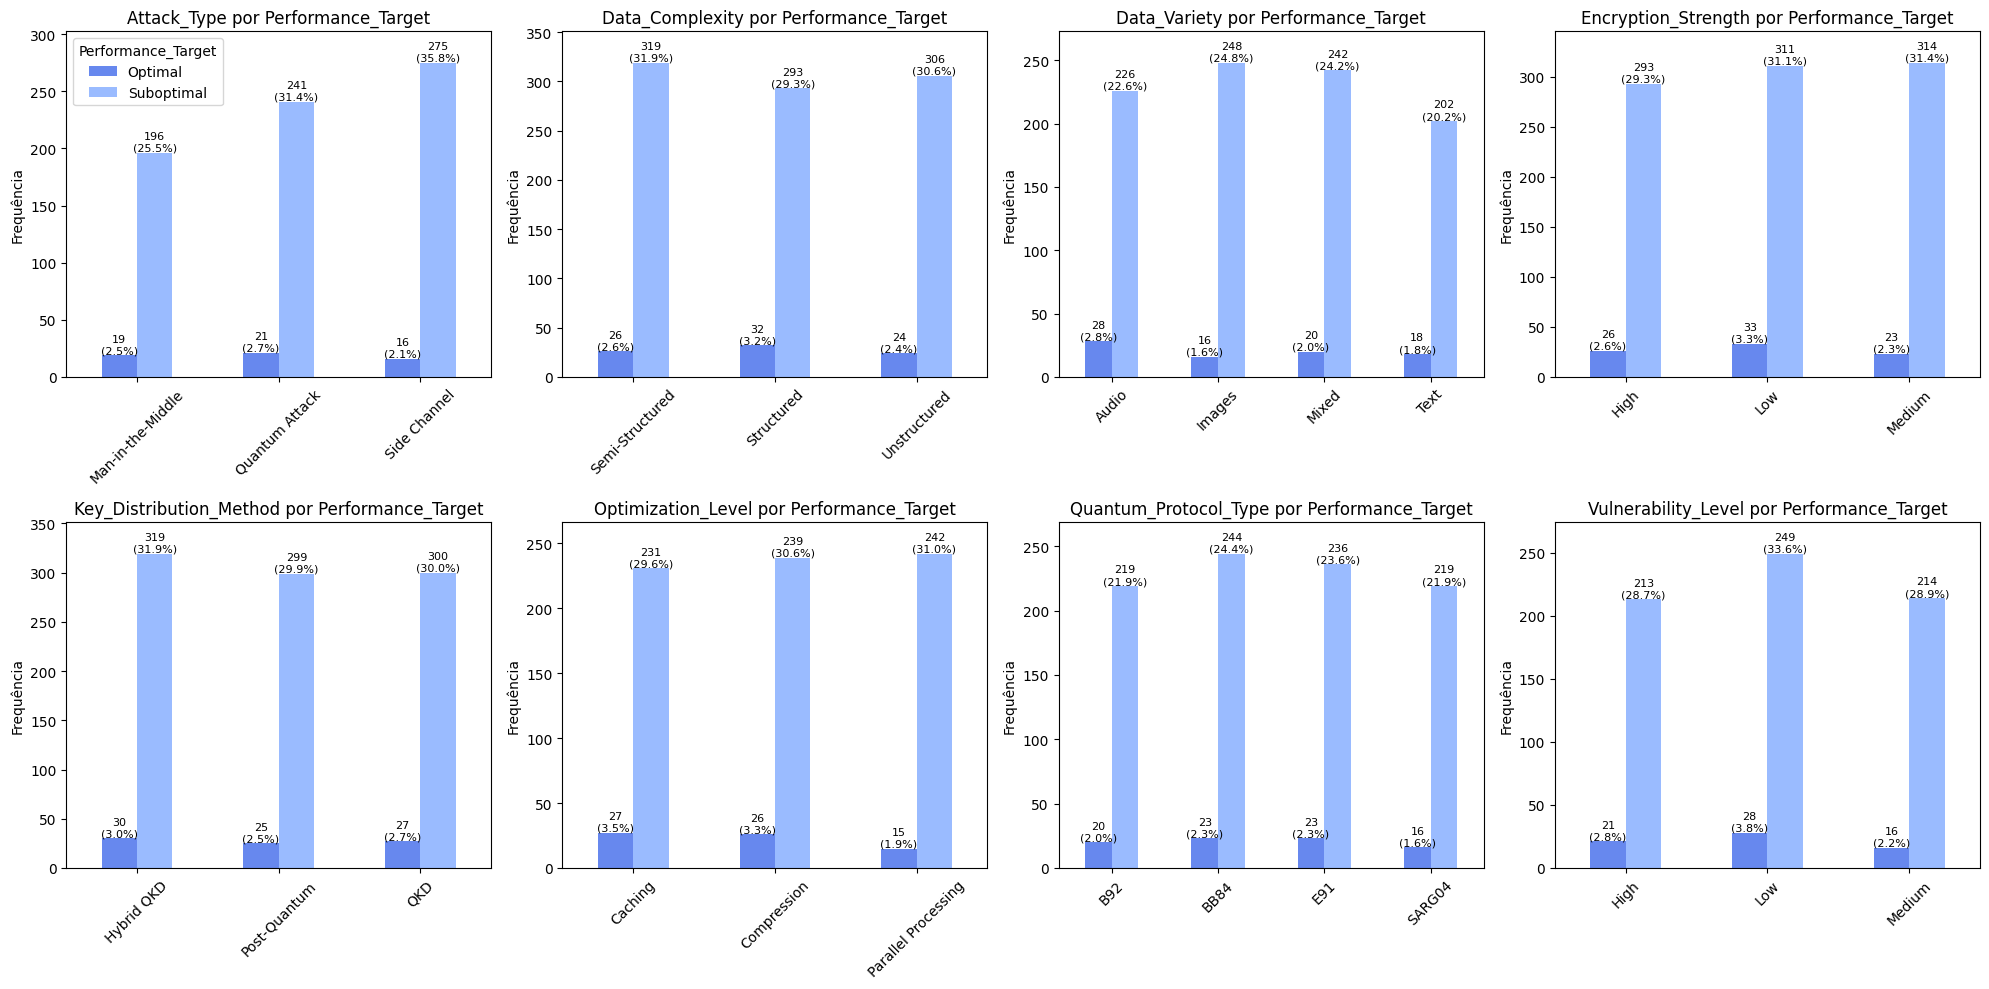

In [12]:
# Usar grouped bar charts para verificar a distribuição das variáveis categóricas em relação à variável alvo 'Performance_Target'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.difference([target_variable])
cols = 4
num_vars = len(categorical_columns)
rows = int(np.ceil(num_vars / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()
for idx, column in enumerate(categorical_columns):
    ax = axes[idx]
    vc = df.groupby([column, target_variable]).size().unstack(fill_value=0)

    vc.plot(kind='bar', ax=ax, stacked=False, color=sns.color_palette("coolwarm"))  # type: ignore
    ax.set_title(f'{column} por {target_variable}')
    ax.set_ylabel('Frequência')
    # Desligar a legenda
    if idx != 0:
        ax.legend_.remove()
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, 1.1 * vc.values.max())

    total = vc.sum().sum()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}\n({height/total*100:.1f}%)',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)
# Desligar eixos sobrando
for j in range(num_vars, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

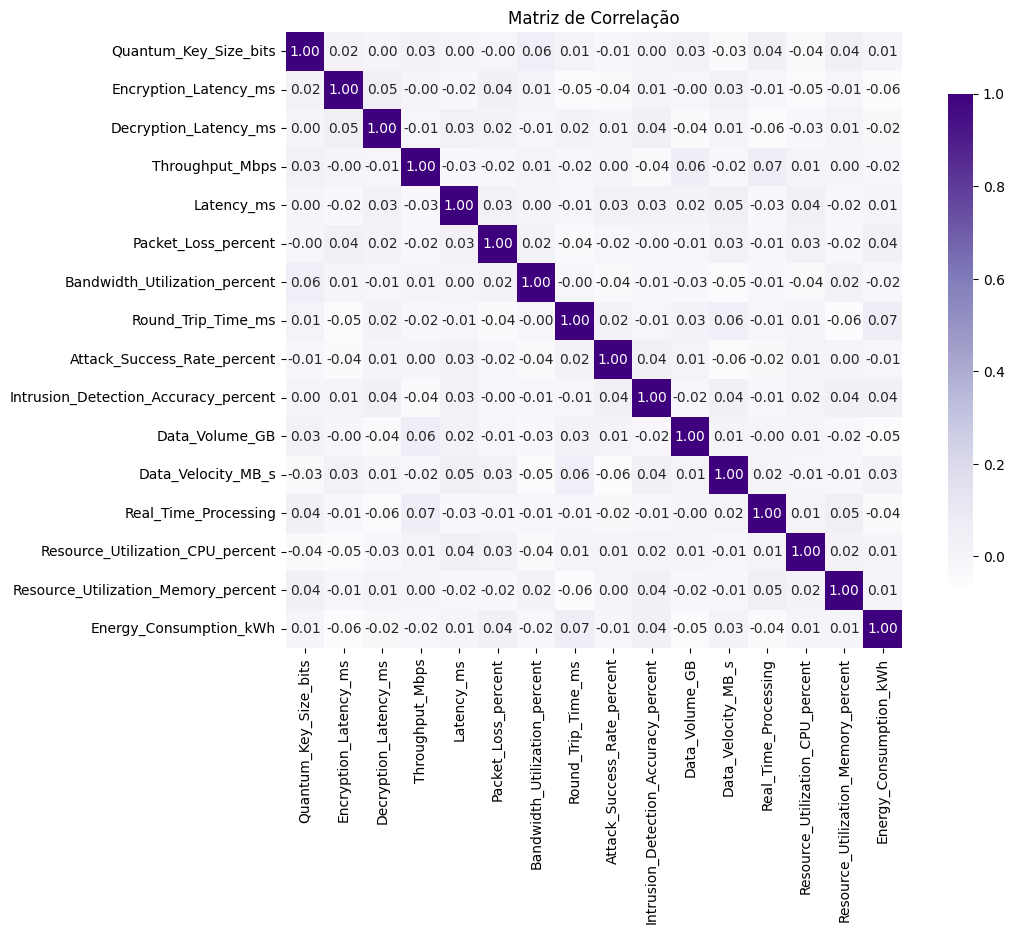

In [13]:
# Criar matriz de correlação para variáveis numéricas e plotar heatmap usando seaborn
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Purples", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação")
plt.show()

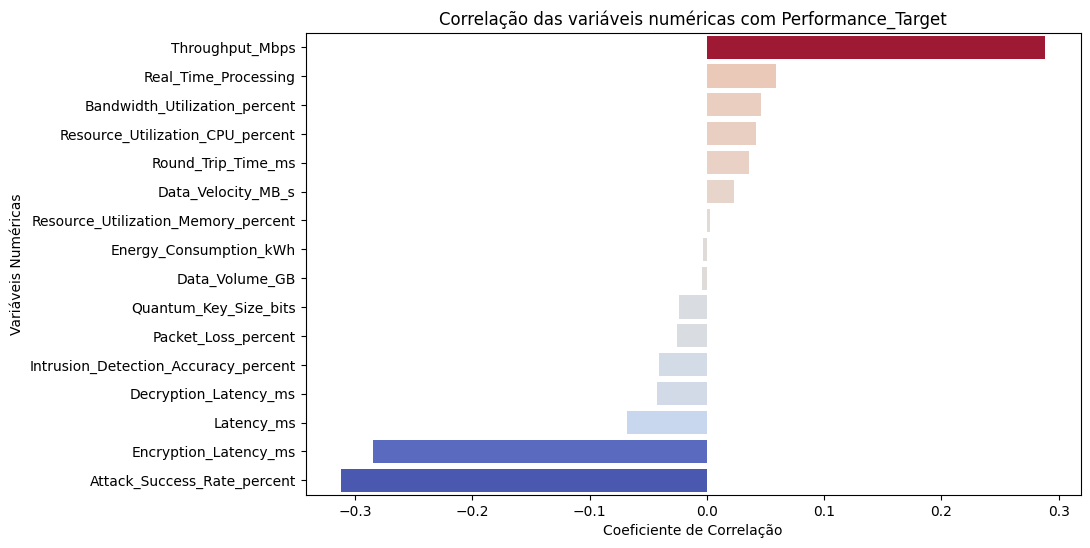

In [14]:
# Criar a matriz de correlação entre as variáveis numéricas em relação à variável alvo 'Performance_Target'
# e plotar um gráfico de barras horizontal para visualizar a força da correlação.
# Como 'Performance_Target' é categórica (e.g. 'Optimal' / 'Suboptimal'), convertê-la para numérica antes.
numerical_columns = df.select_dtypes(include=['number']).columns.difference([target_variable])

# Mapear rótulos conhecidos para numérico; se houver rótulos inesperados ou NaNs, usar pd.Categorical como fallback.
y_numeric = df[target_variable].map({'Optimal': 1, 'Suboptimal': 0})

if y_numeric.isnull().any():
	# pd.Categorical.codes -> integers starting at 0; -1 indica NaN
	y_codes = pd.Categorical(df[target_variable]).codes
	y_numeric = pd.Series(y_codes, index=df.index).replace(-1, np.nan)

correlations = df[numerical_columns].corrwith(y_numeric).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm", hue=correlations.values, legend=False)  # type: ignore
plt.title(f'Correlação das variáveis numéricas com {target_variable}')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis Numéricas')
plt.show()

<Axes: >

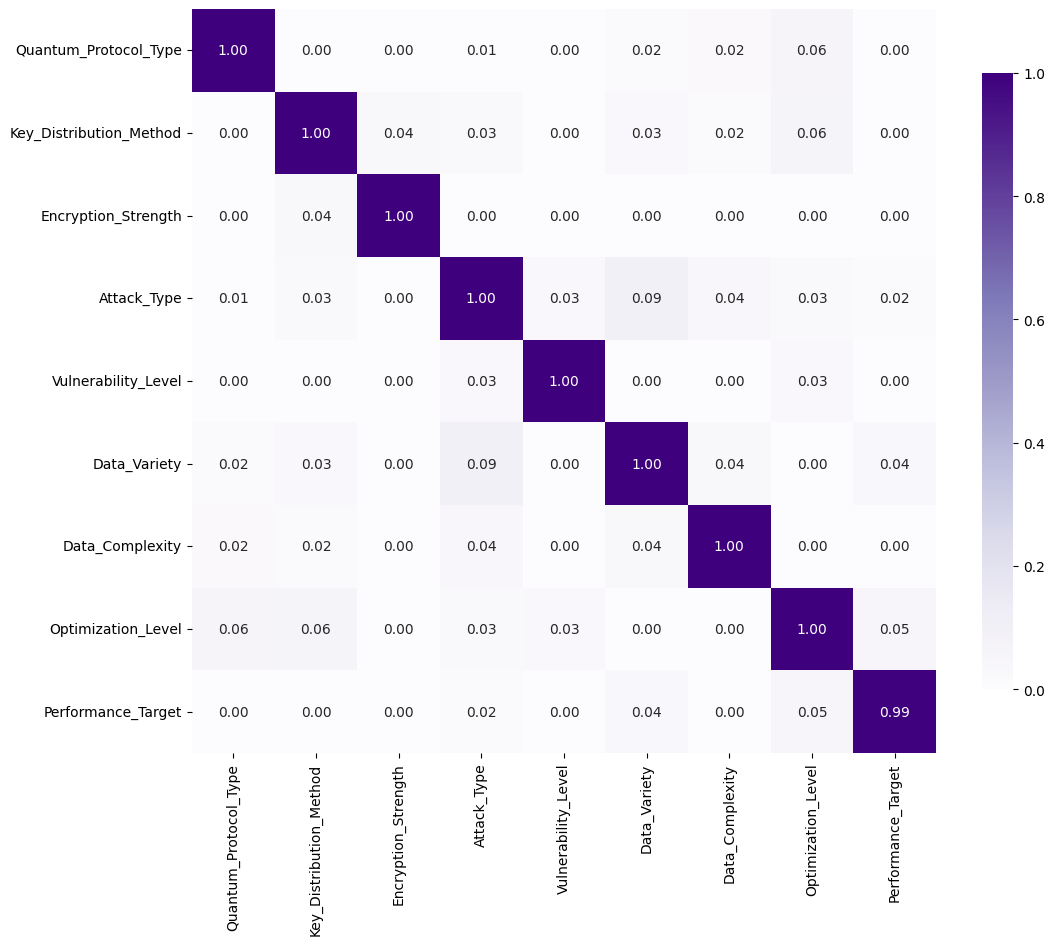

In [15]:
# Criar a matriz de correlação para variáveis categóricas usando Cramér's V e plotar heatmap
def cramers_v(x: pd.Series, y: pd.Series) -> float:
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
n = len(categorical_columns)
cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=categorical_columns, columns=categorical_columns)
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i <= j:
            cv = cramers_v(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = cv
            cramers_v_matrix.loc[col2, col1] = cv
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="Purples", square=True, cbar_kws={"shrink": .8})

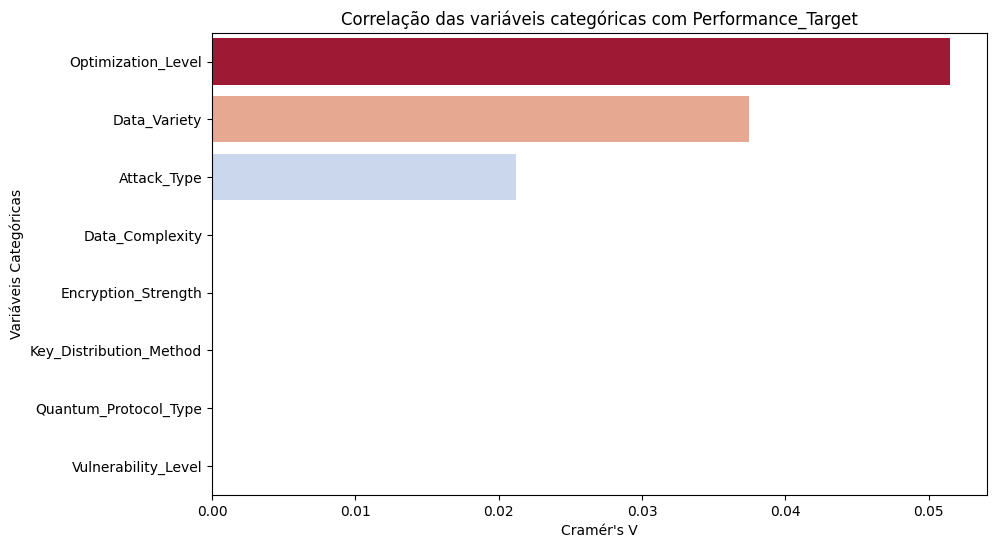

In [16]:
# Criar a matriz de correlação entre as variáveis categóricas em relação à variável alvo 'Performance_Target'
# e plotar um gráfico de barras horizontal para visualizar a força da correlação.
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.difference([target_variable])
cramers_v_values = {}
for column in categorical_columns:
    cv = cramers_v(df[column], df[target_variable])
    cramers_v_values[column] = cv
cramers_v_series = pd.Series(cramers_v_values).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=cramers_v_series.values, y=cramers_v_series.index, palette="coolwarm", hue=cramers_v_series.values, legend=False)  # type: ignore
plt.title(f'Correlação das variáveis categóricas com {target_variable}')
plt.xlabel("Cramér's V")
plt.ylabel('Variáveis Categóricas')
plt.show()

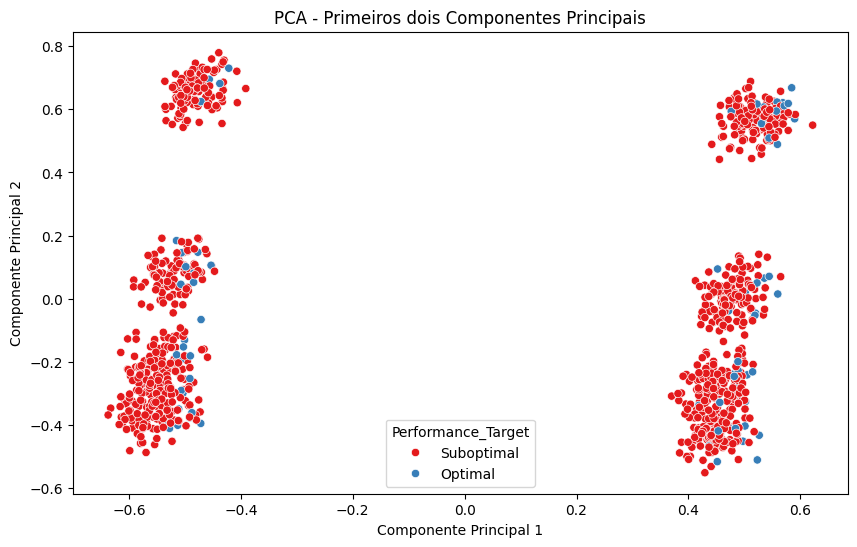

In [33]:
# Separar features e target
X = df.drop(columns=[target_variable])
y = df[target_variable]
# Padronizar os dados numéricos
numerical_columns = X.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
# Aplicar PCA
pca = PCA(n_components=len(numerical_columns))
X_pca = pca.fit_transform(X.select_dtypes(include=['number']))
# Plotar os dois primeiros componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1")
plt.title('PCA - Primeiros dois Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title=target_variable)
plt.show()

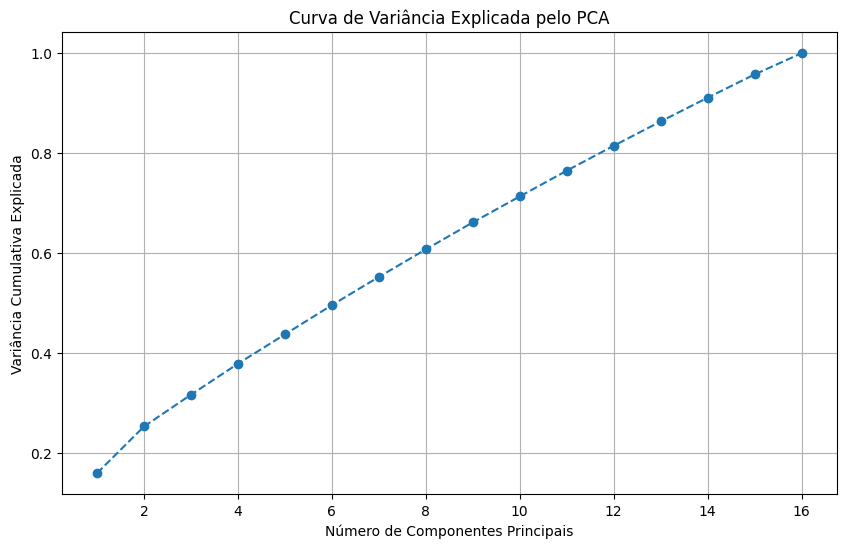

In [34]:
# Com PCA, verificar a curva de variância explicada para determinar o número ideal de componentes principais
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Curva de Variância Explicada pelo PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Cumulativa Explicada')
plt.grid()
plt.show()

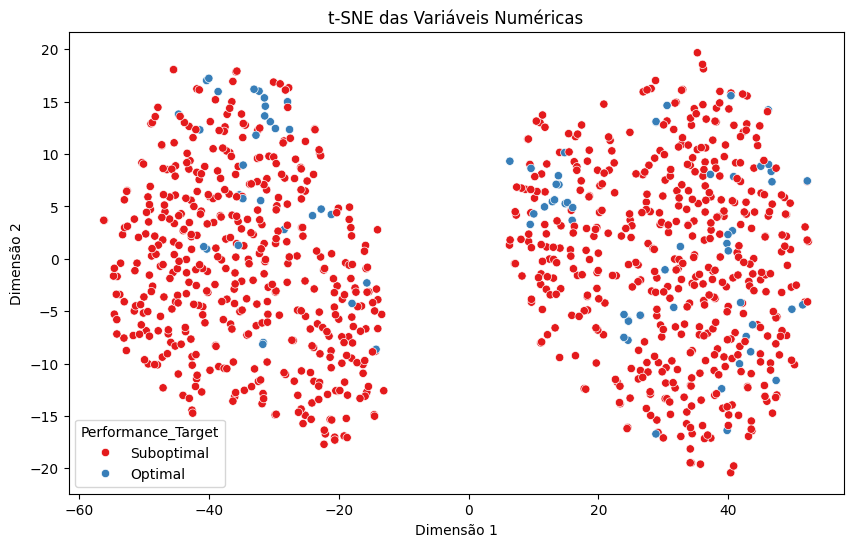

In [35]:
# Usando t-SNE para verificar se há agrupamentos naturais nos dados
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X.select_dtypes(include=['number']))
# Plotar os resultados do t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="Set1")  # type: ignore
plt.title('t-SNE das Variáveis Numéricas')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.legend(title=target_variable)
plt.show()

---

## 2. Pré-processamento dos Dados e _Feature Engineering_

1. Há valores ausentes em 'Attack_Type', 'Vulnerability_Level' e 'Optimization_Level'. Esses atributos contêm informações relevantes para a classificação. Inclusive, a ausência de um valor pode indicar uma característica importante do dado. Portanto, em vez de remover essas linhas, optei por preencher os valores ausentes com a string 'Unknown', preservando assim a integridade dos dados;
2. Algumas características, apesar de numéricas, representam categorias discretas: 'Quantum_Key_Size_bits' e 'Real_Time_Processing'. O Restante das variáveis numéricas são contínuas e contém uma distribuição aproximadamente uniforme. Portanto, para a sua normalização, utilizei a técnica de Min-Max Scaling, que é adequada para preservar a distribuição dos dados contínuos;
3. Há um desbalanceamento elevado na variável alvo 'Performance_Target', com a classe 'Suboptimal' representando 92% dos dados. Inicialmente, optei por não aplicar técnicas de balanceamento, como oversampling ou undersampling. Todavia, a avaliação da performance da rede será feita usando o 'k-fold cross-validation' estratificado, o que ajudará a mitigar os efeitos do desbalanceamento durante o treinamento e validação do modelo;
4. As variáveis consideradas categóricas serão codificadas usando _one-hot encoding_.

In [17]:
# Preencher os valores ausentes com 'Unknown' para as colunas categóricas com valores ausentes
df_preprocessed = df.copy()
missing_categorical_cols = ['Attack_Type', 'Vulnerability_Level', 'Optimization_Level']
for col in missing_categorical_cols:
    df_preprocessed[col] = df_preprocessed[col].fillna('Unknown')

# Verificar valores ausentes após o preenchimento
print(f"Valores ausentes após o preenchimento:{df_preprocessed.isnull().sum()}")

Valores ausentes após o preenchimento:Quantum_Key_Size_bits                   0
Quantum_Protocol_Type                   0
Key_Distribution_Method                 0
Encryption_Latency_ms                   0
Decryption_Latency_ms                   0
Throughput_Mbps                         0
Latency_ms                              0
Packet_Loss_percent                     0
Bandwidth_Utilization_percent           0
Round_Trip_Time_ms                      0
Encryption_Strength                     0
Attack_Type                             0
Vulnerability_Level                     0
Attack_Success_Rate_percent             0
Intrusion_Detection_Accuracy_percent    0
Data_Volume_GB                          0
Data_Variety                            0
Data_Velocity_MB_s                      0
Data_Complexity                         0
Real_Time_Processing                    0
Resource_Utilization_CPU_percent        0
Resource_Utilization_Memory_percent     0
Energy_Consumption_kWh                

In [18]:
# Tratar as colunas numéricas discretas como categóricas
discrete_numerical_cols = ['Quantum_Key_Size_bits', 'Real_Time_Processing']
for col in discrete_numerical_cols:
    df_preprocessed[col] = df_preprocessed[col].astype(str)

In [19]:
def add_features(df):
    # segurança: diferença entre detecção e sucesso de ataque
    if {'Intrusion_Detection_Accuracy_percent', 'Attack_Success_Rate_percent'}.issubset(df.columns):
        df['Security_Index'] = (df['Intrusion_Detection_Accuracy_percent'] - df['Attack_Success_Rate_percent']).astype(float)
    # eficiência de latência
    if {'Throughput_Mbps', 'Encryption_Latency_ms'}.issubset(df.columns):
        df['Latency_Efficiency'] = df['Throughput_Mbps'] / (df['Encryption_Latency_ms'] + 1)
    # energia por vazão
    if {'Energy_Consumption_kWh', 'Throughput_Mbps'}.issubset(df.columns):
        df['Energy_per_Throughput'] = df['Energy_Consumption_kWh'] / (df['Throughput_Mbps'] + 1e-9)
    # média de latências (se existirem)
    lat_cols = [c for c in ['Encryption_Latency_ms','Decryption_Latency_ms','Latency_ms'] if c in df.columns]
    if len(lat_cols) > 0:
        df['Latency_mean'] = df[lat_cols].mean(axis=1)
    return df

df_preprocessed = add_features(df_preprocessed)

In [20]:
# Ajustar a variável alvo 'Performance_Target' para ter valores binários: 'Optimal' -> 1, 'Suboptimal' -> 0
df_preprocessed['Performance_Target'] = df_preprocessed['Performance_Target'].map({'Optimal': 1, 'Suboptimal': 0})

In [21]:
# Definir as variáveis iniciais para o pré-processamento e modelagem
TARGET_VARIABLE = 'Performance_Target'
CATEGORICAL_COLUMNS = df_preprocessed.select_dtypes(include=['object', 'category']).columns.tolist()
NUMERICAL_COLUMNS = df_preprocessed.select_dtypes(include=['number']).columns.difference([TARGET_VARIABLE]).tolist()

print("Colunas categóricas:", CATEGORICAL_COLUMNS)
print("Colunas numéricas:", NUMERICAL_COLUMNS)

Colunas categóricas: ['Quantum_Key_Size_bits', 'Quantum_Protocol_Type', 'Key_Distribution_Method', 'Encryption_Strength', 'Attack_Type', 'Vulnerability_Level', 'Data_Variety', 'Data_Complexity', 'Real_Time_Processing', 'Optimization_Level']
Colunas numéricas: ['Attack_Success_Rate_percent', 'Bandwidth_Utilization_percent', 'Data_Velocity_MB_s', 'Data_Volume_GB', 'Decryption_Latency_ms', 'Encryption_Latency_ms', 'Energy_Consumption_kWh', 'Energy_per_Throughput', 'Intrusion_Detection_Accuracy_percent', 'Latency_Efficiency', 'Latency_mean', 'Latency_ms', 'Packet_Loss_percent', 'Resource_Utilization_CPU_percent', 'Resource_Utilization_Memory_percent', 'Round_Trip_Time_ms', 'Security_Index', 'Throughput_Mbps']


In [22]:
y = df_preprocessed[TARGET_VARIABLE]
X_df = df_preprocessed.drop(columns=[TARGET_VARIABLE])

1. Usar LabelEncoder para criar arrays inteiros.

2. Evitar _Data Leakage_ movendo `fit` para dentro de cada fold do CV.

3. Evitar _Data Leakage_ calculando o `class weights` por fold usando apenas y_train.

In [23]:
# Criar arrays inteiros para embeddings
X_categorical_int = np.zeros((len(X_df), len(CATEGORICAL_COLUMNS)), dtype=int)
label_encoders = {}

for i, col in enumerate(CATEGORICAL_COLUMNS):
    le = LabelEncoder()
    X_categorical_int[:, i] = le.fit_transform(X_df[col].astype(str))
    label_encoders[col] = le

# Criar DataFrame para facilitar indexação posterior
X_categorical_df = pd.DataFrame(X_categorical_int, columns=CATEGORICAL_COLUMNS, index=X_df.index)

print("Shape dos dados categóricos label-encoded:", X_categorical_df.shape)
print("Cardinalidades por coluna:")
for col in CATEGORICAL_COLUMNS:
    print(f"  {col}: {X_categorical_df[col].nunique()} categorias")
X_categorical_df.head()

Shape dos dados categóricos label-encoded: (1000, 10)
Cardinalidades por coluna:
  Quantum_Key_Size_bits: 4 categorias
  Quantum_Protocol_Type: 4 categorias
  Key_Distribution_Method: 3 categorias
  Encryption_Strength: 3 categorias
  Attack_Type: 4 categorias
  Vulnerability_Level: 4 categorias
  Data_Variety: 4 categorias
  Data_Complexity: 3 categorias
  Real_Time_Processing: 2 categorias
  Optimization_Level: 4 categorias


,Quantum_Key_Size_bits,Quantum_Protocol_Type,Key_Distribution_Method,Encryption_Strength,Attack_Type,Vulnerability_Level,Data_Variety,Data_Complexity,Real_Time_Processing,Optimization_Level
0,3,1,0,1,2,0,2,1,1,3
1,3,1,1,1,3,0,2,1,1,3
2,3,2,0,0,0,2,0,0,1,0
3,0,0,2,0,3,3,1,0,0,2
4,1,2,2,1,0,2,0,0,0,2


In [24]:
# NOTA: Scaler será movido para dentro do loop de CV para evitar data leakage
# Aqui apenas criamos o DataFrame não-escalado para referência
X_numerical_df = pd.DataFrame(X_df[NUMERICAL_COLUMNS].values, columns=NUMERICAL_COLUMNS, index=X_df.index)
print("Shape dos dados numéricos (não-escalados ainda):", X_numerical_df.shape)
X_numerical_df.head()

Shape dos dados numéricos (não-escalados ainda): (1000, 18)


,Attack_Success_Rate_percent,Bandwidth_Utilization_percent,Data_Velocity_MB_s,Data_Volume_GB,Decryption_Latency_ms,Encryption_Latency_ms,Energy_Consumption_kWh,Energy_per_Throughput,Intrusion_Detection_Accuracy_percent,Latency_Efficiency,Latency_mean,Latency_ms,Packet_Loss_percent,Resource_Utilization_CPU_percent,Resource_Utilization_Memory_percent,Round_Trip_Time_ms,Security_Index,Throughput_Mbps
0,38.231709,70.862317,48.112247,591.119462,21.343097,35.153677,3.482189,0.023706,90.527006,4.062913,35.379890,49.642896,0.784638,69.715182,61.885496,135.237133,52.295297,146.889261
1,2.542435,80.306828,11.284507,699.177426,47.622924,79.439052,3.272271,0.060017,92.416689,0.677815,43.774308,4.260948,4.303451,84.980568,67.514640,79.379681,89.874253,54.522812
2,14.323747,87.822996,82.785208,638.781966,67.782635,93.685088,4.297842,0.017552,94.952987,2.586138,61.357285,22.604132,4.008153,37.104425,40.128608,98.423516,80.629240,244.868724
3,40.552422,55.353388,89.278938,516.576674,55.767818,71.399673,0.560232,0.000905,89.712145,8.549466,49.045829,19.969997,1.215919,87.835832,54.993475,64.637315,49.159723,618.978515
4,22.674705,53.903645,15.603028,247.983800,10.021325,51.927749,0.476705,0.000568,91.874874,15.851260,34.613211,41.890560,1.027366,62.824875,68.011373,49.824114,69.200169,838.971535


In [25]:
# Mantemos separados: numérico (será escalado por fold) e categórico (label-encoded)
print("Dados numéricos shape:", X_numerical_df.shape)
print("Dados categóricos shape:", X_categorical_df.shape)
print("\nIMPORTANTE: O scaling será aplicado DENTRO de cada fold do CV para evitar data leakage!")

Dados numéricos shape: (1000, 18)
Dados categóricos shape: (1000, 10)

IMPORTANTE: O scaling será aplicado DENTRO de cada fold do CV para evitar data leakage!


In [26]:
# Salvar os DataFrames pré-processados para uso futuro
# Salvar na pasta ./data/
data_dir = "./data/preprocessed/"
os.makedirs(data_dir, exist_ok=True)
df_preprocessed.to_csv(os.path.join(data_dir, "df_preprocessed.csv"), index=False)
X_numerical_df.to_csv(os.path.join(data_dir, "X_numerical_preprocessed.csv"), index=False)
X_categorical_df.to_csv(os.path.join(data_dir, "X_categorical_preprocessed.csv"), index=False)
y.to_csv(os.path.join(data_dir, "y_preprocessed.csv"), index=False)

---

## Métricas _naive_

Por se tratar de um _dataset_ muito desbalanceado, um modelo _naive_ que sempre prediz a classe majoritária ("Suboptimal") pode ser usado como referência inicial.

**Contexto:**
* **Dataset:** 92% "Suboptimal" (Negativa) e 8% "Optimal" (Positiva).
* **Modelo Ingênuo:** Prevê "Suboptimal" 100% das vezes.

**Matriz de Confusão Resultante:**
* **Verdadeiros Positivos (TP):** 0 (Nunca prevê "Optimal")
* **Falsos Positivos (FP):** 0 (Nunca prevê "Optimal")
* **Verdadeiros Negativos (TN):** 92 (Acerta todos os "Suboptimal")
* **Falsos Negativos (FN):** 8 (Erra todos os "Optimal")

---

### Resumo das Métricas

| Métrica | Fórmula | Cálculo | Valor Final |
| :--- | :--- | :--- | :--- |
| **Acurácia** | `(TP+TN) / Total` | `(0+92) / 100` | **92%** |
| **Precisão** | `TP / (TP+FP)` | `0 / (0+0)` | **0.0** |
| **Recall** | `TP / (TP+FN)` | `0 / (0+8)` | **0.0** |
| **F1-Score**| `2*(Prec*Rec)/(Prec+Rec)` | `2*(0*0)/(0+0)` | **0.0** |
| **ROC_AUC** | - | - | **0.5** |
| **PR_AUC** | - | - | **8% (0.08)** |


Assim sendo, o modelo ingênuo apresenta uma alta acurácia de 92% devido ao desbalanceamento do dataset. No entanto, suas métricas de precisão, recall e F1-score são todas zero, indicando que ele falha completamente em identificar a classe minoritária ("Optimal"). O ROC_AUC de 0.5 sugere que o modelo não tem capacidade discriminativa, enquanto o PR_AUC de 8% reflete a baixa performance na detecção da classe positiva em um cenário desbalanceado.